# Part 1. Data pre-processing & Exploratory Data Analysis

### 1.1 Import Library

In [1]:
# Numerical & Statistical Libraries
import numpy as np  # Numerical computations
import math  # Mathematical functions
import scipy.stats as stats  # Statistical functions
import os # file handling

# Data Handling
import pandas as pd  # Data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization

# Suppress Warnings for Cleaner Output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Suppress future warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)  # Suppress deprecation warnings

### 1.2 Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_excel('data/CustomerChurn.xlsx')

# Display dataset preview and basic info
display(df.head())  # Show first 5 rows
df.info()  # Show dataset structure (columns, non-null counts, data types)


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

## 1.3 Data Pre-processing

#### Organise column names

In [3]:
# Standardize column names by replacing spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Display updated column names
print("Updated column names:", df.columns.tolist())


Updated column names: ['loyaltyid', 'customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn']


#### Drop Columns (Not Importance)

In [4]:
# Drop the 'LoyaltyID' column
df.drop(columns=['loyaltyid'], inplace=True)

# Confirm column removal
print("Updated columns:", df.columns.tolist())

Updated columns: ['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn']


#### Replacement of Class values 

In [5]:
# -------------------- Find and Display Unique Values --------------------

# Create a dictionary to store unique values for each column in the DataFrame
unique_values = {col: df[col].unique() for col in df.columns}

# Display unique values for each column
for col, values in unique_values.items():
    print(f"\nColumn: {col}")  # Print the column name
    num_unique = len(values)
    print(f"Number of Unique Values: {num_unique}")  # Display count of unique values
    
    # Display unique values with handling for large number of values
    if num_unique > 20:  # Show only first 20 values if too many
        print(f"Unique Values (first 20 shown): {values[:20]} ...")
    else:
        print(f"Unique Values: {values}")

    print("-" * 60)  # Separator for better readability



Column: customer_id
Number of Unique Values: 7043
Unique Values (first 20 shown): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU'
 '9763-GRSKD' '7469-LKBCI' '8091-TTVAX' '0280-XJGEX' '5129-JLPIS'
 '3655-SNQYZ' '8191-XWSZG' '9959-WOFKT' '4190-MFLUW' '4183-MYFRB'] ...
------------------------------------------------------------

Column: senior_citizen
Number of Unique Values: 2
Unique Values: ['No' 'Yes']
------------------------------------------------------------

Column: partner
Number of Unique Values: 2
Unique Values: ['Yes' 'No']
------------------------------------------------------------

Column: dependents
Number of Unique Values: 2
Unique Values: ['No' 'Yes']
------------------------------------------------------------

Column: tenure
Number of Unique Values: 73
Unique Values (first 20 shown): [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30] ...
------------------------------------

In [6]:
# Replace "No phone service" with "No" in 'multiple_lines'
df["multiple_lines"] = df["multiple_lines"].replace("No phone service", "No")

# Replace "No internet service" with "No" in multiple columns
columns_to_replace = [
    "online_security", "online_backup", "device_protection", 
    "tech_support", "streaming_tv", "streaming_movies"
]

df[columns_to_replace] = df[columns_to_replace].replace("No internet service", "No")

print("Replacement completed successfully!")


Replacement completed successfully!


#### Change data type

In [7]:
# Convert 'total_charges' to numeric, coercing errors to NaN
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Display any rows with NaN values after conversion
missing_total_charges = df[df['total_charges'].isna()]

if not missing_total_charges.empty:
    print(f"Warning: {len(missing_total_charges)} rows have NaN values in 'total_charges' after conversion.")
    display(missing_total_charges)  # Display affected rows if using Jupyter Notebook

print("'total_charges' successfully converted to numeric!")

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


'total_charges' successfully converted to numeric!


#### Handling null values

In [8]:
# Check if there are any missing values in the DataFrame
if df.isnull().values.any():
    print("Warning: There are missing values in the dataset!")
    
    # Display the count of missing values per column
    missing_counts = df.isnull().sum()
    print("Missing values per column:")
    print(missing_counts[missing_counts > 0])
else:
    print("No missing values in the dataset!")


Missing values per column:
total_charges    11
dtype: int64


In [9]:
# Fill missing values in 'total_charges' with the column mean
if df['total_charges'].isnull().values.any():
    mean_value = df['total_charges'].mean()
    df['total_charges'].fillna(mean_value, inplace=True)
    print(f"Filled missing values in 'total_charges' with mean: {mean_value:.2f}")
else:
    print("No missing values found in 'total_charges'.")

Filled missing values in 'total_charges' with mean: 2283.30


### Checking outliers 

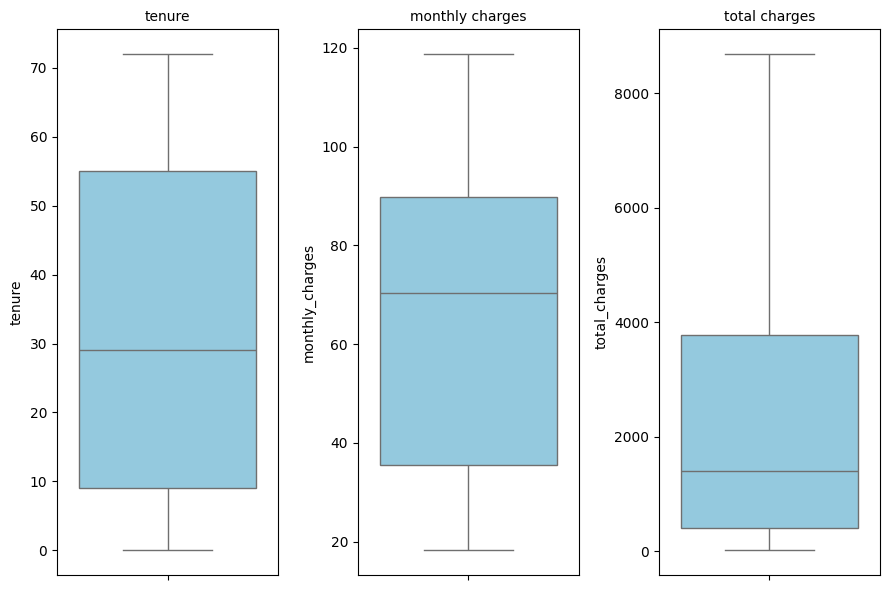

In [10]:
# Automatically detect numerical features
num_feat = df.select_dtypes(include=['number']).columns.tolist()

# Set figure size dynamically based on the number of features
plt.figure(figsize=(len(num_feat) * 3, 6))

# Loop through numerical features and create a subplot for each
for i, feature in enumerate(num_feat):
    plt.subplot(1, len(num_feat), i+1)  # Dynamically adjust subplot count
    sns.boxplot(y=df[feature], color='skyblue')  # Fixed `df[feature]` access
    plt.title(feature.replace('_', ' '), fontsize=10)  # Format titles
    plt.xlabel('')  # Remove x-axis label for a cleaner look

# Adjust layout after the loop
plt.tight_layout()
plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   object 
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   object 
 6   multiple_lines     7043 non-null   object 
 7   internet_service   7043 non-null   object 
 8   online_security    7043 non-null   object 
 9   online_backup      7043 non-null   object 
 10  device_protection  7043 non-null   object 
 11  tech_support       7043 non-null   object 
 12  streaming_tv       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  contract           7043 non-null   object 
 15  paperless_billing  7043 non-null   object 
 16  payment_method     7043 

## -------------------- Variable Segmentation --------------------

## Define variable categories
customer_vars = ['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure']


services_vars = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 
                 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


account_vars = ['contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']

## Target Variable
Churn --> categorical variable, can have as values 'Yes' or 'No'

## 1.4. Exploratory Data Analysis (EDA)

### 1.4.1 Churn distribution

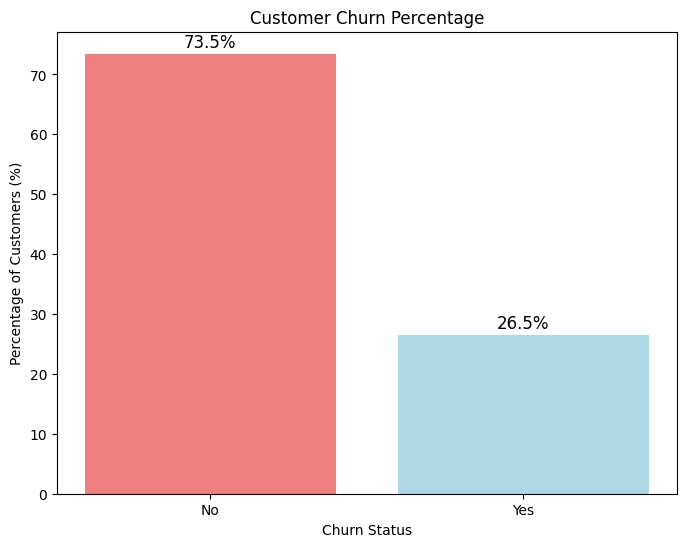

In [12]:
# Count churn values and convert to percentages
churn_counts = df['churn'].value_counts(normalize=True) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['lightcoral', 'lightblue'])

# Add labels and title
plt.xlabel("Churn Status")
plt.ylabel("Percentage of Customers (%)")
plt.title("Customer Churn Percentage")

# Show percentage values on bars
for index, value in enumerate(churn_counts.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

# Show the plot
plt.show()


### 1.4.2 Numerical data

In [13]:
# Automatically detect numerical features
num_feat = df.select_dtypes(include=['number']).columns.tolist()

# Display summary statistics
df[num_feat].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2283.30,2265.00,18.80,402.22,1400.55,3786.60,8684.80


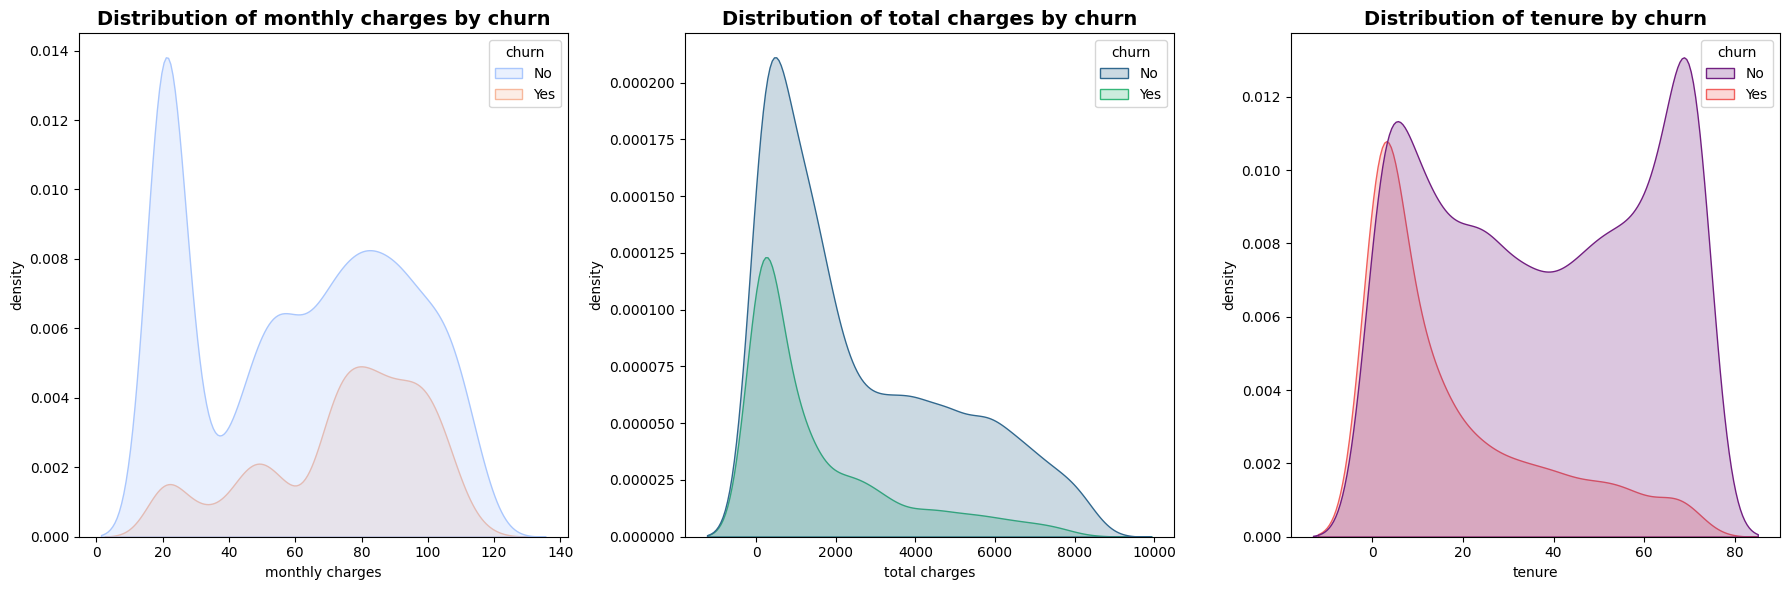

In [14]:
# Define the features and color palettes
features = ['monthly_charges', 'total_charges', 'tenure']
palettes = ['coolwarm', 'viridis', 'magma']

# Create a figure with 3 subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Loop through features to generate KDE plots
for i, feature in enumerate(features):
    sns.kdeplot(
        x=df[feature], hue=df['churn'], ax=ax[i], fill=True, palette=palettes[i]
    )
    ax[i].set(xlabel=feature.replace('_', ' '), ylabel='density')
    ax[i].set_title(f'Distribution of {feature.replace("_", " ")} by churn', 
                    fontsize=14, weight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


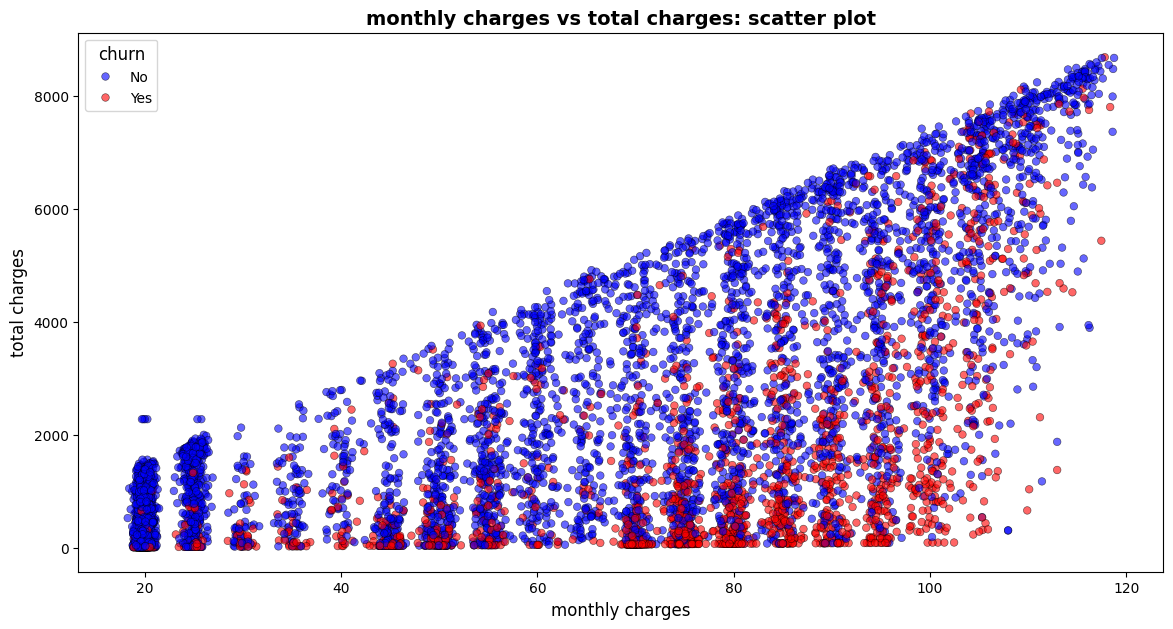

In [15]:
# Set figure size
plt.figure(figsize=(14, 7))

# Scatter plot using seaborn with hue for 'Churn'
sns.scatterplot(
    data=df, x='monthly_charges', y='total_charges', 
    hue='churn', palette={'Yes': 'red', 'No': 'blue'},  # Corrected case
    alpha=0.6, edgecolor='black', s=30
)

# Labels and title
plt.xlabel('monthly charges', fontsize=12)
plt.ylabel('total charges', fontsize=12)
plt.title('monthly charges vs total charges: scatter plot', fontsize=14, weight='bold')

# Show legend properly
plt.legend(title='churn', title_fontsize=12, loc='upper left')

# Show the plot
plt.show()


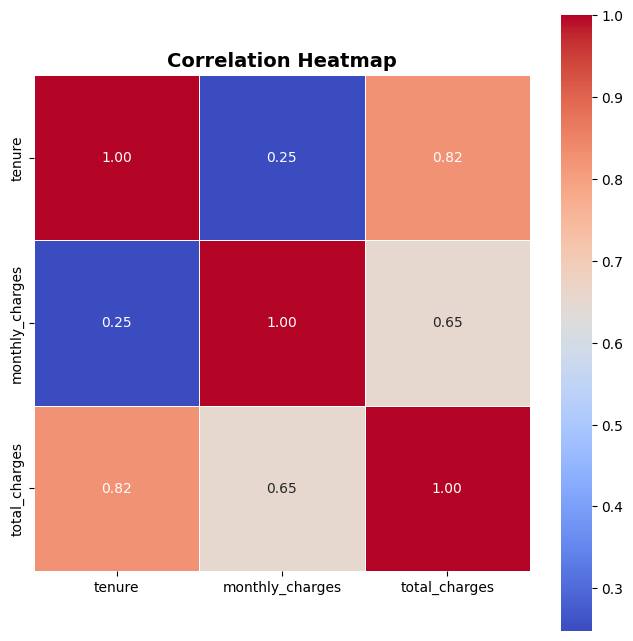

In [16]:
# Set figure size
plt.figure(figsize=(8, 8))

# Create a heatmap with improved styling
sns.heatmap(df[num_feat].corr(), 
            annot=True, 
            square=True, 
            cmap='coolwarm',  # Improved color contrast
            fmt=".2f",        # Limit decimal places for better readability
            linewidths=0.5,   # Add gridlines for clarity
            cbar=True         # Show color bar
           )

# Set title
plt.title('Correlation Heatmap', fontsize=14, weight='bold')

# Show the plot
plt.show()


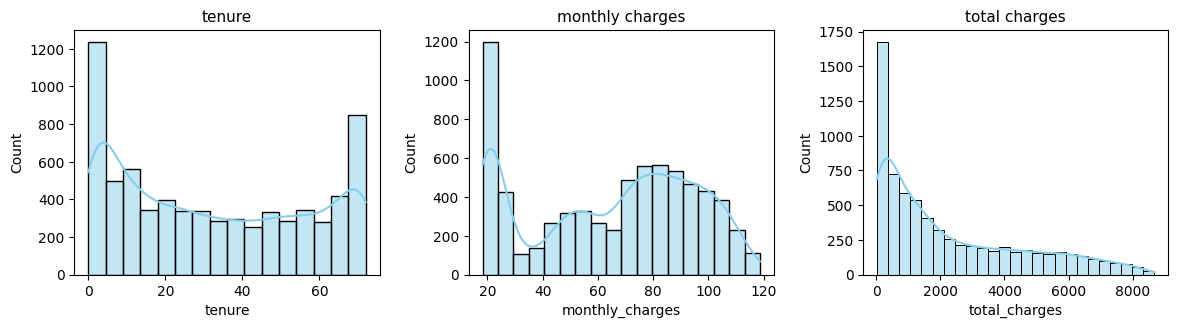

In [17]:
# Number of numeric features
num_feats = len(num_feat)

# Dynamically determine rows & columns (e.g., 3x3, 3x4, etc.)
cols = 3  # Fixed number of columns
rows = math.ceil(num_feats / cols)  # Calculate required rows

# Set figure size dynamically
plt.figure(figsize=(cols * 4, rows * 3.5))

# Loop through numerical features and create subplots
for i, col in enumerate(num_feat):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(col.replace('_', ' '), fontsize=11)  # Format title

# Adjust layout after all subplots are added
plt.tight_layout(pad=1.5)
plt.show()


### 1.4.3 Categorical data - Services

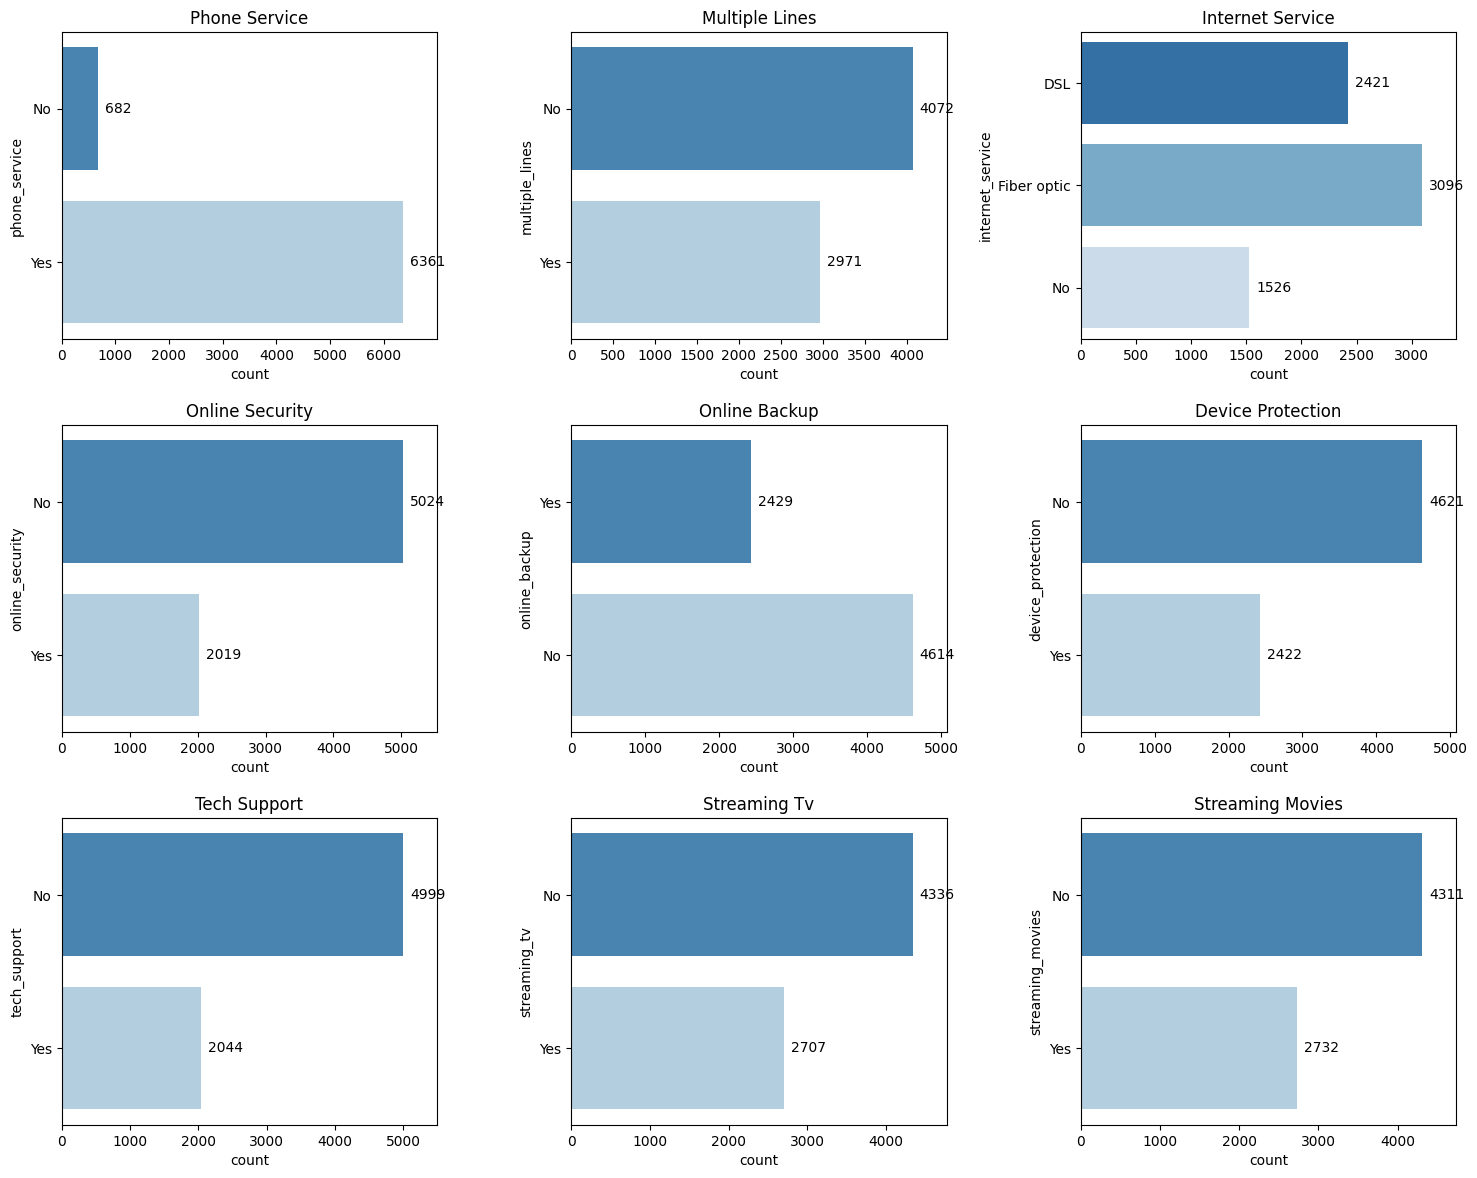

In [18]:
# List of services
services = ['phone_service', 'multiple_lines', 'internet_service', 
            'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv', 'streaming_movies']

# Dynamically determine rows & columns
cols = 3
rows = math.ceil(len(services) / cols)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through services and plot countplots
for i, col in enumerate(services):
    ax = sns.countplot(data=df, y=col, ax=axes[i], palette='Blues_r')
    ax.set_title(col.replace('_', ' ').title(), fontsize=12)  # Format title
    
    # Set x-axis limit dynamically based on max count
    max_count = df[col].value_counts().max()
    ax.set_xlim(0, max_count * 1.1)  # Give 10% extra space

    # Add bar labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f', padding=5)

# Hide any unused subplots if the grid is larger than needed
for j in range(i + 1, len(axes)):  
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=1.5)
plt.show()


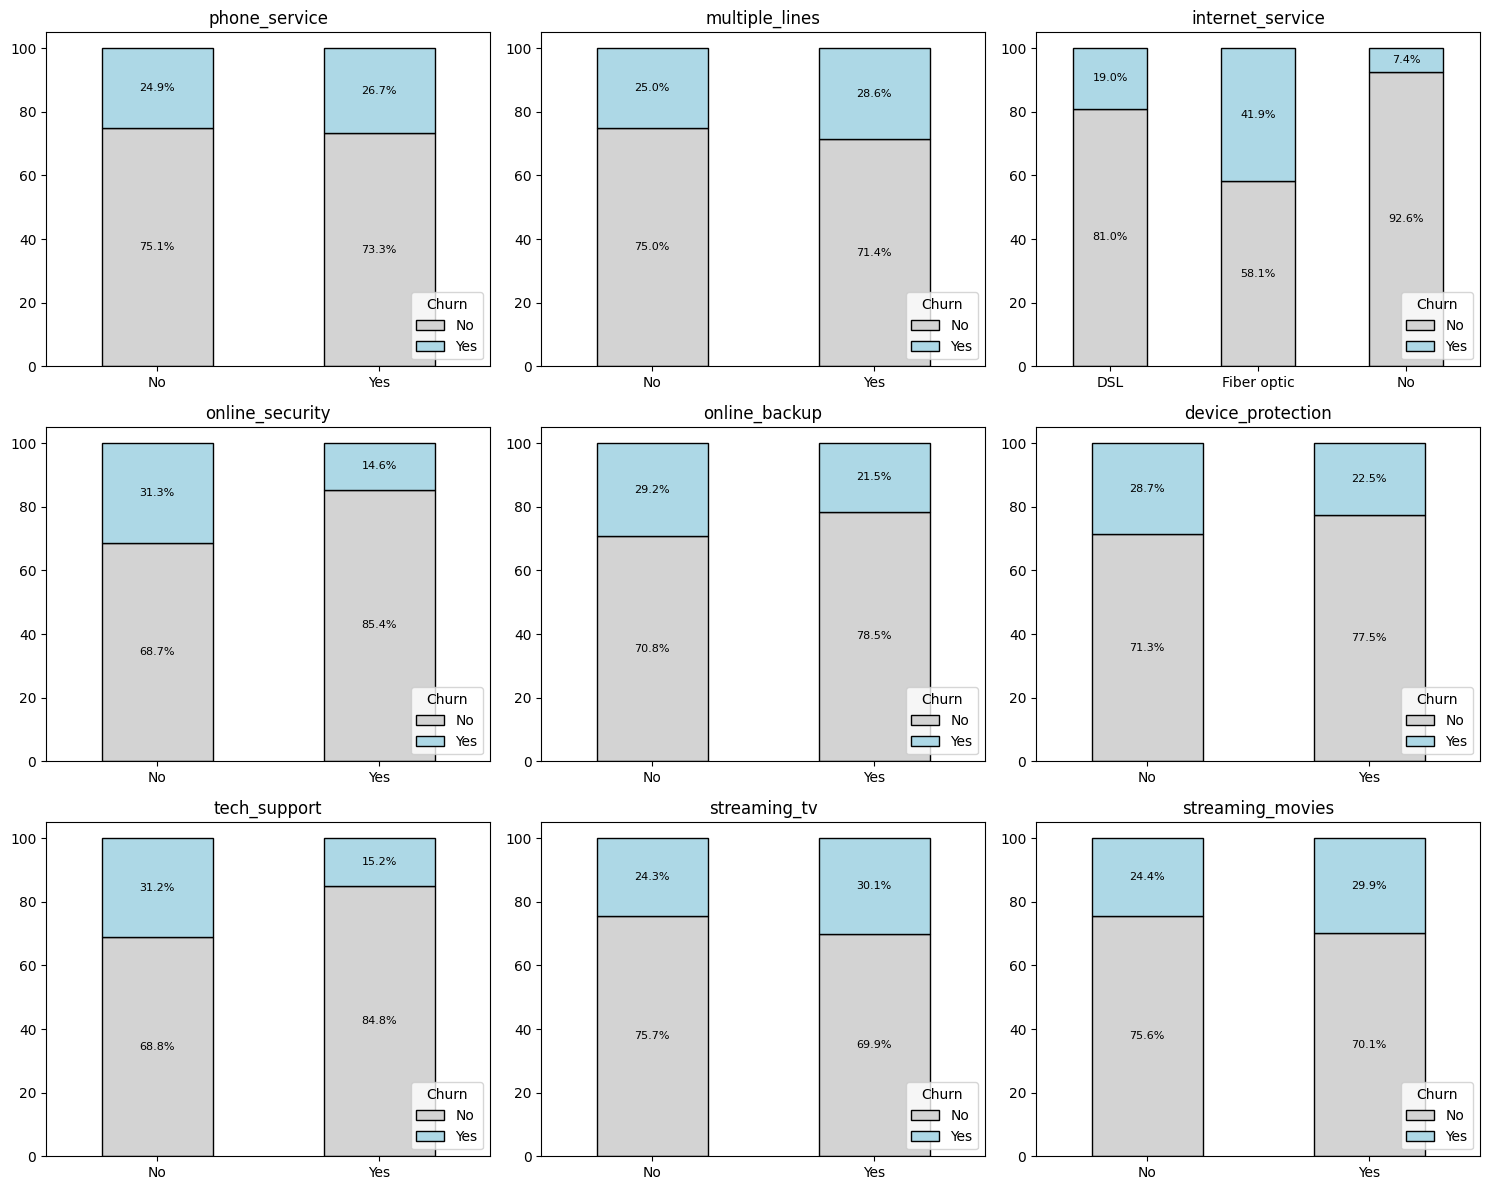

In [19]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Function to plot the bar chart for each item
def plot_churn_bar_chart(services_chunk, axes_row):
    for i, item in enumerate(services_chunk):
        # Calculate churn percentage
        contract_churn_percent = df.groupby([item, 'churn']).size() / df.groupby(item).size() * 100
        pivot_df = contract_churn_percent.unstack()

        # Plot the stacked bar chart
        ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', 
                           ax=axes_row[i], rot=0)

        # Annotate each bar with percentage
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

        # Set titles and labels
        ax.set_title(item)
        ax.set_xlabel('')
        ax.legend(title='Churn', loc='lower right')

# Split the services list into chunks of 3 (for each row in the subplot grid)
chunk_size = 3
for row_idx in range(3):
    plot_churn_bar_chart(services[row_idx*chunk_size:(row_idx+1)*chunk_size], axes[row_idx])

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


### 1.4.4 Categorical data - Customer info

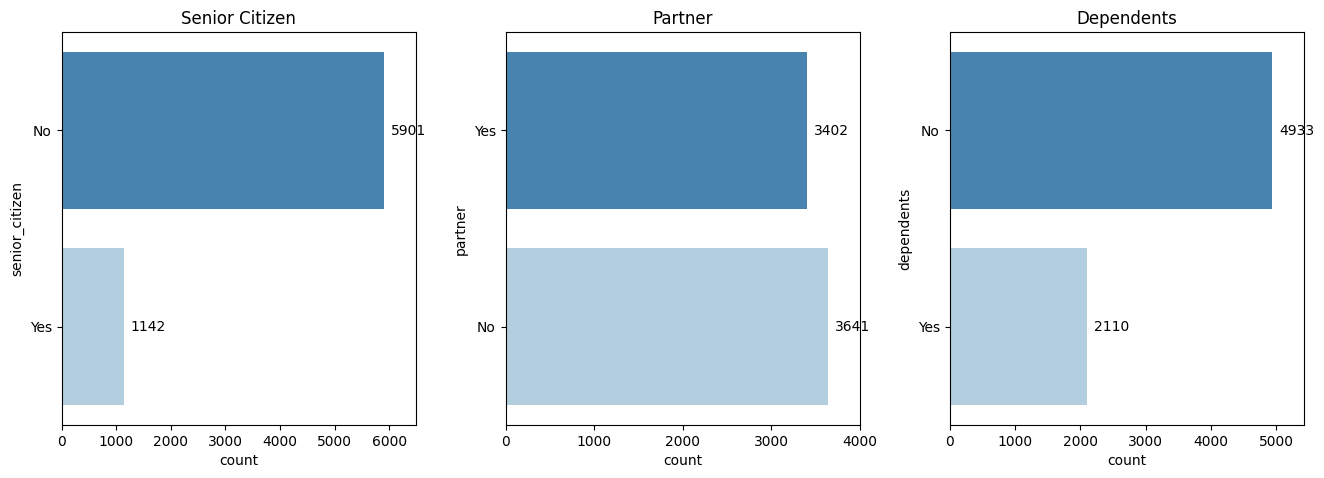

In [20]:
# Customer information columns
cust_info = ['senior_citizen', 'partner', 'dependents']

# Set number of columns and rows dynamically
cols = len(cust_info)  # Set number of columns based on the number of features
rows = 1  # Single-row layout

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4.5, 5))

# If only one subplot, make it iterable
if cols == 1:
    axes = [axes]

# Loop through features and create count plots
for i, col in enumerate(cust_info):
    ax = sns.countplot(data=df, y=col, ax=axes[i], palette="Blues_r")

    # Dynamically set x-axis limits based on max count
    max_count = df[col].value_counts().max()
    ax.set_xlim(0, max_count * 1.1)  # Give some extra space

    # Add bar labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f', padding=5)

    # Format title
    ax.set_title(col.replace('_', ' ').title(), fontsize=12)

# Adjust layout for spacing
plt.tight_layout(pad=1.5)
plt.show()


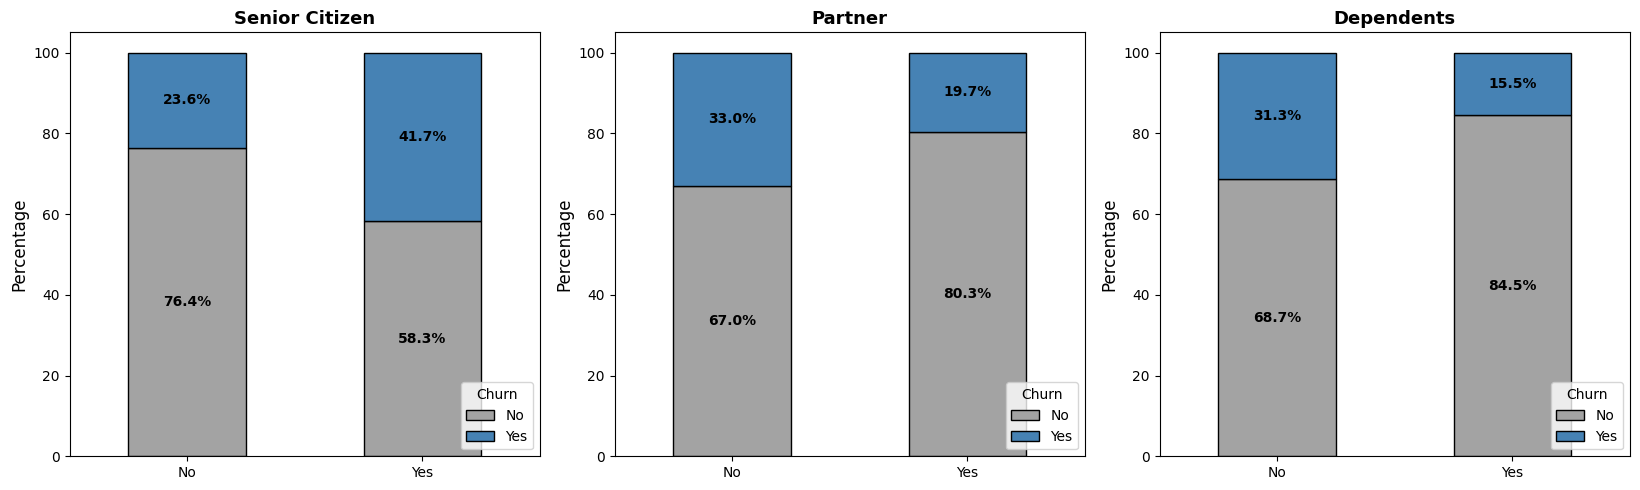

In [21]:
# Dynamically set the number of columns and rows
cols = len(cust_info)
rows = 1  # Single row layout

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5.5, 5))

# If only one subplot, make it iterable
if cols == 1:
    axes = [axes]

# Loop through each categorical variable in cust_info
for i, item in enumerate(cust_info):
    # Calculate churn percentages
    contract_churn_percent = df.groupby([item, 'churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()

    # Plot stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, 
                       color=['#A3A3A3', '#4682B4'],  # Improved color contrast
                       edgecolor='black', ax=axes[i], rot=0)

    # Annotate bars with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 3:  # Avoid text clutter for small values
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                        ha='center', va='center', fontsize=10, fontweight='bold')

    # Improve labels and titles
    ax.set_title(item.replace('_', ' ').title(), fontsize=13, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage', fontsize=12)
    ax.legend(title='Churn', loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 1.4.5 Categorical data - Payment info

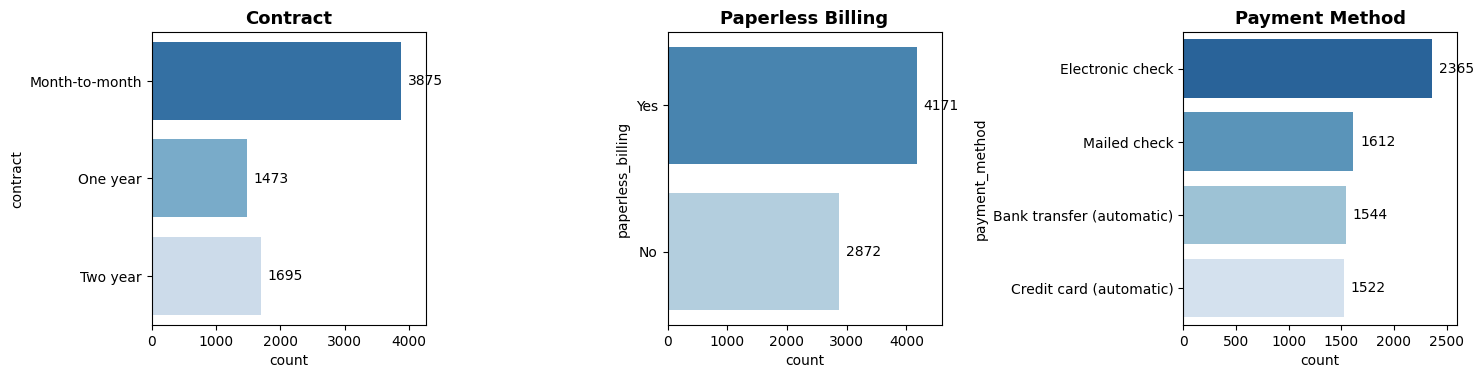

In [22]:
# Customer payment information columns
payment_info = ['contract', 'paperless_billing', 'payment_method']

# Set number of columns and dynamically determine rows
cols = min(3, len(payment_info))  # Max 3 columns per row
rows = math.ceil(len(payment_info) / cols)  # Adjust rows dynamically

# Create a grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 4))

# Flatten axes if more than one row
if rows > 1:
    axes = axes.flatten()
elif cols == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one subplot

# Loop through features and create count plots
for i, col in enumerate(payment_info):
    ax = sns.countplot(data=df, y=col, ax=axes[i], palette="Blues_r")

    # Dynamically set x-axis limits based on max count
    max_count = df[col].value_counts().max()
    ax.set_xlim(0, max_count * 1.1)  # 10% extra space for better visualization

    # Add bar labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f', padding=5)

    # Format title
    ax.set_title(col.replace('_', ' ').title(), fontsize=13, weight='bold')

# Hide any unused subplots if there are fewer than expected
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=1.5)
plt.show()


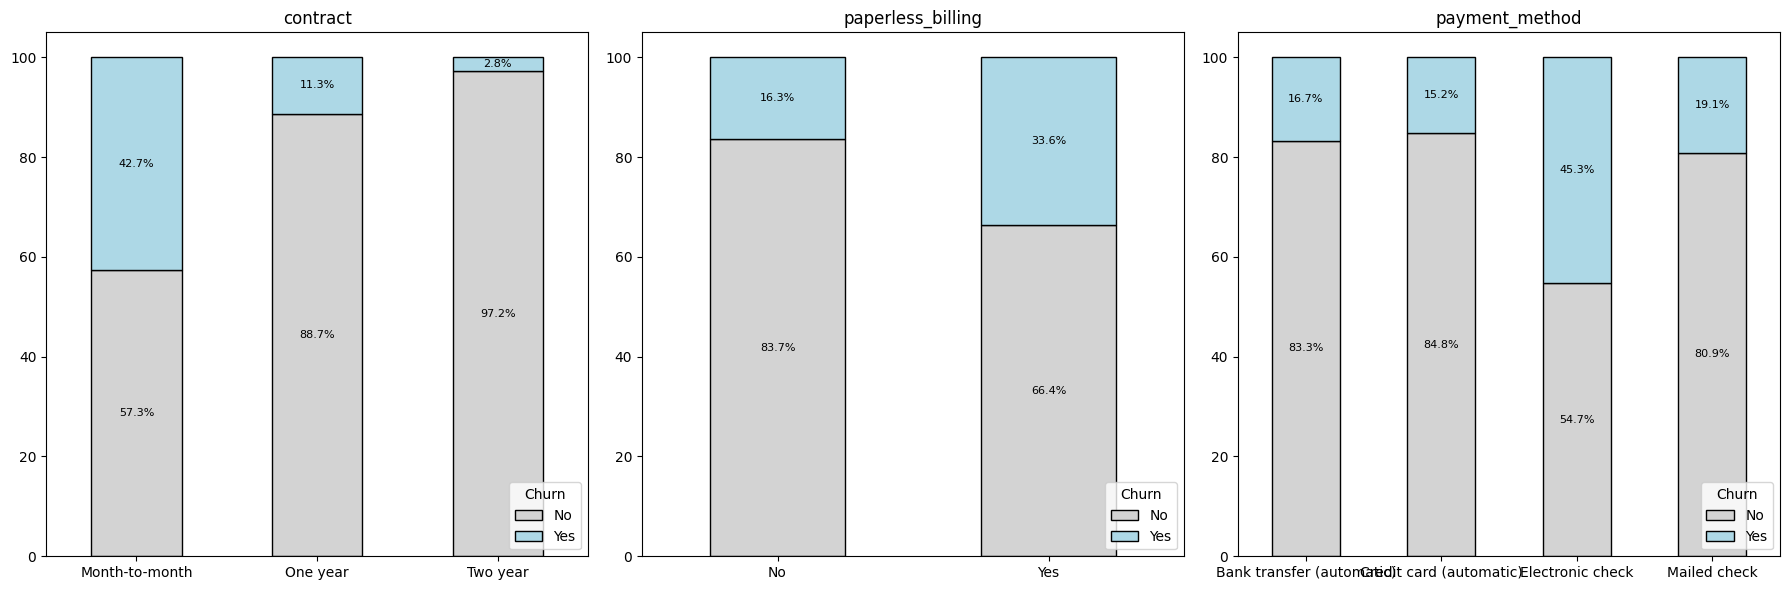

In [23]:
# Create a grid of subplots (1 row, 3 columns)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot each of the customer information variables
for i, item in enumerate(payment_info):
    contract_churn_percent = df.groupby([item, 'churn']).size() / df.groupby(item).size() * 100
    pivot_df = contract_churn_percent.unstack()
    
    # Plot stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, color=['lightgrey', 'lightblue'], edgecolor='black', 
                       ax=axes[i], rot=0)
    
    # Annotate bars with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
    
    # Set titles and remove x-axis label
    ax.set_title(item)
    ax.set_xlabel('')
    ax.legend(title='Churn', loc='lower right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


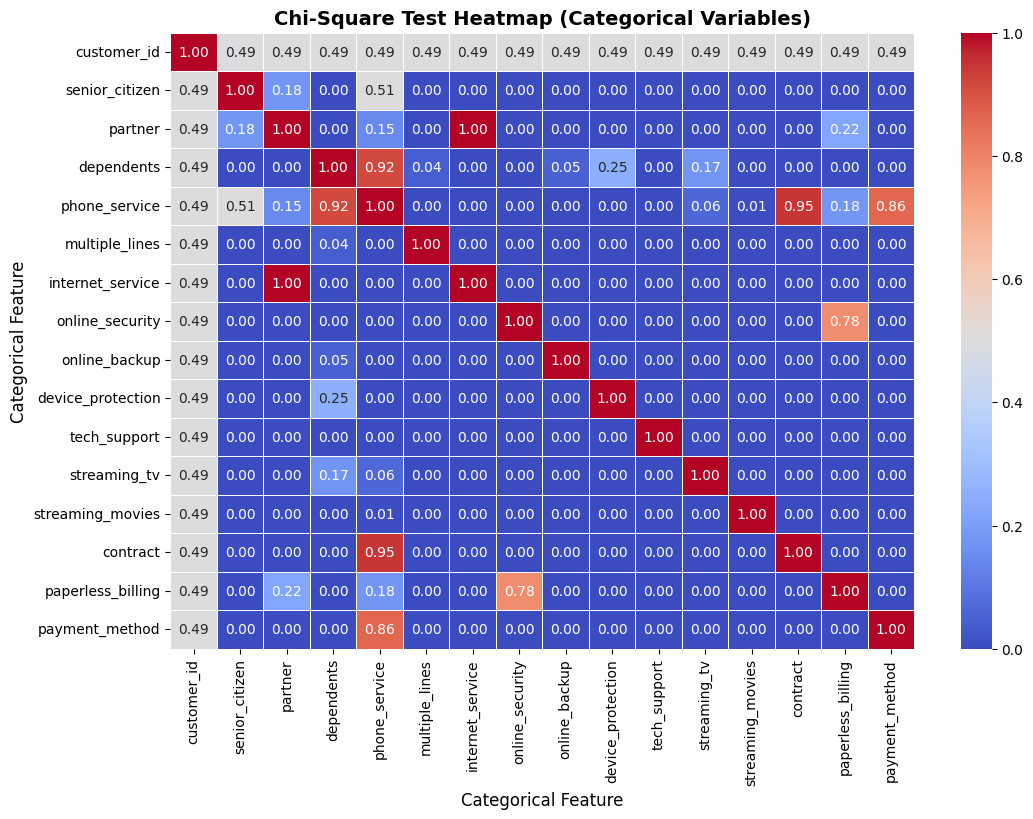

In [24]:

# Identify categorical variables (excluding 'Churn')
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features.remove('churn')  # Remove churn from the list

# Create an empty dataframe to store Chi-Square test p-values
chi2_results = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Compute Chi-Square test for each pair of categorical variables
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            chi2_results.loc[col1, col2] = 1.0  # Set diagonal to 1 (self-comparison)
        else:
            contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Chi-square test
            chi2_results.loc[col1, col2] = p  # Store p-value

# Convert to numeric and sort for better visualization
chi2_results = chi2_results.astype(float)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(chi2_results, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)

# Title and labels
plt.title('Chi-Square Test Heatmap (Categorical Variables)', fontsize=14, weight='bold')
plt.xlabel('Categorical Feature', fontsize=12)
plt.ylabel('Categorical Feature', fontsize=12)

# Show plot
plt.show()


In [25]:
# ---------------------- Save Encoded Data ----------------------

# Create directory if it doesn't exist
save_dir = "preprocessed_data"
os.makedirs(save_dir, exist_ok=True)

# Define file paths
preprocessed_path = os.path.join(save_dir, "preprocessed_data.csv")

# Save the transformed training and test data
df.to_csv(preprocessed_path, index=False)

# Confirmation messages
print("\n Pre-processed dataset saved successfully!")
print(f"🔹  Pre-processed dataset saved at '{preprocessed_path}'")



 Pre-processed dataset saved successfully!
🔹  Pre-processed dataset saved at 'preprocessed_data\preprocessed_data.csv'
